In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns


In [2]:
df = pd.read_csv('vacancies.csv')

In [3]:
df

,name,tags,link,experience,lower_salary,upper_salary,currency
0,Ведущий менеджер по продажам,"['Активные продажи', 'Ведение переговоров', 'Т...",https://adsrv.hh.ru/click?b=533104&c=7&place=3...,Требуемый опыт работы: не требуется,150000.0,150000.0,₽
1,Data Scientist (команда Поиска),"['Python', 'PyTorch', 'SQL', 'Machine Learning...",https://saratov.hh.ru/vacancy/83116089?from=va...,Требуемый опыт работы: 3–6 лет,350000.0,350000.0,₽
2,Data Scientist в b2c направление,"['Python', 'Machine Learning', 'SQL', 'PyTorch...",https://saratov.hh.ru/vacancy/84009554?from=va...,Требуемый опыт работы: 3–6 лет,NaN,NaN,NaN
3,Портфельный риск-аналитик / Middle Data Scient...,[],https://saratov.hh.ru/vacancy/82421077?from=va...,Требуемый опыт работы: 3–6 лет,NaN,NaN,NaN
4,Трафик-менеджер,"['Анализ трафика', 'Аналитика', 'Маркетинг', '...",https://saratov.hh.ru/vacancy/84386152?from=va...,Требуемый опыт работы: 3–6 лет,110000.0,140000.0,₽
...,...,...,...,...,...,...,...
795,BI Developer (Tableau),"['Tableau', 'BI', 'SQL']",https://saratov.hh.ru/vacancy/85714273?from=va...,Требуемый опыт работы: 3–6 лет,NaN,NaN,NaN
796,Performance-маркетолог,[],https://saratov.hh.ru/vacancy/85557982?from=va...,Требуемый опыт работы: 1–3 года,NaN,NaN,NaN
797,Ведущий специалист RPA,"['Управление проектами', 'Базы данных', 'Data ...",https://saratov.hh.ru/vacancy/82854946?from=va...,Требуемый опыт работы: 1–3 года,NaN,NaN,NaN
798,IT Специалист/ Engineer (RPA),"['Управление проектами', 'Базы данных', 'Data ...",https://saratov.hh.ru/vacancy/82855036?from=va...,Требуемый опыт работы: 1–3 года,NaN,NaN,NaN


In [4]:
df.shape

(800, 7)

In [5]:
df.describe()

,lower_salary,upper_salary
count,187.000000,187.000000
mean,134893.550802,166982.855615
std,117371.793825,153270.633569
min,1.000000,1.000000
25%,40000.000000,42500.000000
50%,120000.000000,150000.000000
75%,200000.000000,250000.000000
max,556080.000000,1000000.000000


In [6]:
df.groupby(['experience']).agg({'upper_salary':'mean'})

,upper_salary
experience,
Требуемый опыт работы: 1–3 года,150838.000000
Требуемый опыт работы: 3–6 лет,189981.488889
Требуемый опыт работы: более 6 лет,255334.500000
Требуемый опыт работы: не требуется,83230.923077


In [7]:
df.groupby(['experience']).agg({'lower_salary':'mean'})

,lower_salary
experience,
Требуемый опыт работы: 1–3 года,118073.593220
Требуемый опыт работы: 3–6 лет,158497.044444
Требуемый опыт работы: более 6 лет,180001.166667
Требуемый опыт работы: не требуется,70538.615385


In [8]:
df.isna().sum()

name              3
tags              0
link              0
experience        3
lower_salary    613
upper_salary    613
currency        640
dtype: int64

In [9]:
df['mean_salary'] = df['lower_salary'].add(df['upper_salary'])
df['mean_salary'] = df['mean_salary'].div(2)

In [10]:
df

,name,tags,link,experience,lower_salary,upper_salary,currency,mean_salary
0,Ведущий менеджер по продажам,"['Активные продажи', 'Ведение переговоров', 'Т...",https://adsrv.hh.ru/click?b=533104&c=7&place=3...,Требуемый опыт работы: не требуется,150000.0,150000.0,₽,150000.0
1,Data Scientist (команда Поиска),"['Python', 'PyTorch', 'SQL', 'Machine Learning...",https://saratov.hh.ru/vacancy/83116089?from=va...,Требуемый опыт работы: 3–6 лет,350000.0,350000.0,₽,350000.0
2,Data Scientist в b2c направление,"['Python', 'Machine Learning', 'SQL', 'PyTorch...",https://saratov.hh.ru/vacancy/84009554?from=va...,Требуемый опыт работы: 3–6 лет,NaN,NaN,NaN,NaN
3,Портфельный риск-аналитик / Middle Data Scient...,[],https://saratov.hh.ru/vacancy/82421077?from=va...,Требуемый опыт работы: 3–6 лет,NaN,NaN,NaN,NaN
4,Трафик-менеджер,"['Анализ трафика', 'Аналитика', 'Маркетинг', '...",https://saratov.hh.ru/vacancy/84386152?from=va...,Требуемый опыт работы: 3–6 лет,110000.0,140000.0,₽,125000.0
...,...,...,...,...,...,...,...,...
795,BI Developer (Tableau),"['Tableau', 'BI', 'SQL']",https://saratov.hh.ru/vacancy/85714273?from=va...,Требуемый опыт работы: 3–6 лет,NaN,NaN,NaN,NaN
796,Performance-маркетолог,[],https://saratov.hh.ru/vacancy/85557982?from=va...,Требуемый опыт работы: 1–3 года,NaN,NaN,NaN,NaN
797,Ведущий специалист RPA,"['Управление проектами', 'Базы данных', 'Data ...",https://saratov.hh.ru/vacancy/82854946?from=va...,Требуемый опыт работы: 1–3 года,NaN,NaN,NaN,NaN
798,IT Специалист/ Engineer (RPA),"['Управление проектами', 'Базы данных', 'Data ...",https://saratov.hh.ru/vacancy/82855036?from=va...,Требуемый опыт работы: 1–3 года,NaN,NaN,NaN,NaN


In [11]:
salary_by_experience  = df.groupby('experience')['mean_salary'].median()

In [12]:
salary_by_experience

experience
Требуемый опыт работы: 1–3 года        125000.0
Требуемый опыт работы: 3–6 лет         185000.0
Требуемый опыт работы: более 6 лет     237500.0
Требуемый опыт работы: не требуется     70000.0
Name: mean_salary, dtype: float64

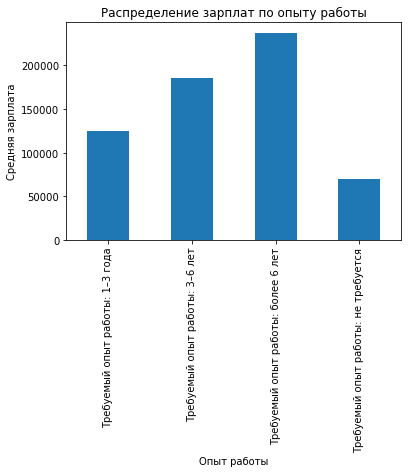

In [13]:
salary_by_experience.plot(kind='bar')
plt.xlabel('Опыт работы')
plt.ylabel('Средняя зарплата')
plt.title('Распределение зарплат по опыту работы')
plt.show()

In [14]:
###jobs_count = df['name'].value_counts()


In [15]:
skills = ' '.join(df['tags']).split()   

In [16]:
skills  = pd.Series(skills).value_counts()                
                

In [17]:
popular_skills = skills.head(20)

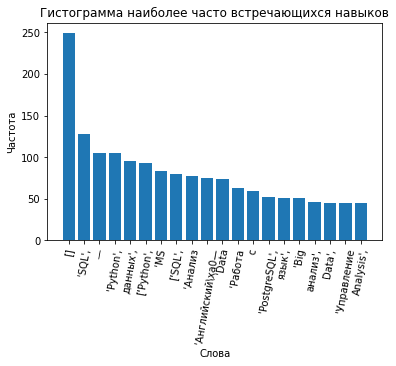

In [18]:
plt.bar(popular_skills.index, popular_skills.values)
plt.xlabel('Слова')
plt.ylabel('Частота')
plt.title('Гистограмма наиболее часто встречающихся навыков')
plt.xticks(rotation=80)
plt.show()

In [19]:
popular_skills.head(20)

[]                  249
'SQL',              128
—                   105
'Python',           105
данных',             96
['Python',           93
'MS                  84
['SQL',              80
'Анализ              77
'Английский\xa0—     75
'Data                74
'Работа              63
с                    60
'PostgreSQL',        52
язык',               51
'Big                 51
анализ',             46
Data',               45
'Управление          45
Analysis',           45
dtype: int64

In [20]:
df.isna().sum()

name              3
tags              0
link              0
experience        3
lower_salary    613
upper_salary    613
currency        640
mean_salary     613
dtype: int64

In [21]:
df_1  = df.copy()

In [22]:
df_1.dropna(subset=['mean_salary'], inplace=True)

In [23]:
df_1.dropna(subset=['name'], inplace=True)

In [24]:
#df['name'].value_counts()
df['mean_salary'].count()

187

In [42]:

a = df_1.sort_values('mean_salary', ascending = False)
top_20_vacancies= a.head(20)

top_20_vacancies

,name,tags,link,experience,lower_salary,upper_salary,currency,mean_salary
683,Senior менеджер по продажах ИТ услуг,[],https://saratov.hh.ru/vacancy/85042517?from=va...,Требуемый опыт работы: более 6 лет,150000.0,1000000.0,₽,575000.0
494,Team Lead Go,"['go', 'Управление командой', 'Kafka', 'ELK', ...",https://saratov.hh.ru/vacancy/84908071?from=va...,Требуемый опыт работы: 3–6 лет,556080.0,556080.0,₽,556080.0
326,Lead Data Scientist в R&D-команду логистики Ма...,"['Computer Vision', 'ML', 'Python', 'SQL', 'Bi...",https://saratov.hh.ru/vacancy/83441997?from=va...,Требуемый опыт работы: 3–6 лет,400000.0,650000.0,₽,525000.0
621,Лидер стека QA (TechLead),"['REST API', 'Kafka', 'Agile Project Managemen...",https://saratov.hh.ru/vacancy/85699854?from=va...,Требуемый опыт работы: более 6 лет,500000.0,500000.0,₽,500000.0
174,Data Architect,"['PostgreSQL', 'Scrum', 'ORACLE', 'Умение прин...",https://saratov.hh.ru/vacancy/79894983?from=va...,Требуемый опыт работы: 3–6 лет,500000.0,500000.0,₽,500000.0
75,Lead Data Analyst,"['Amplitude', 'SQL', 'GrowthBook', 'DWH', 'Ана...",https://saratov.hh.ru/vacancy/84694663?from=va...,Требуемый опыт работы: 3–6 лет,450000.0,450000.0,₽,450000.0
673,DevOps-инженер (Hadoop администратор),['Английский\xa0— A1 — Начальный'],https://saratov.hh.ru/vacancy/85265330?from=va...,Требуемый опыт работы: 1–3 года,350000.0,500000.0,₽,425000.0
530,Администратор баз данных PostgreSQL (DBA Postg...,"['СУБД', 'CI/CD', 'DBA', 'Администрирование', ...",https://saratov.hh.ru/vacancy/82028522?from=va...,Требуемый опыт работы: 3–6 лет,410000.0,410000.0,₽,410000.0
30,Data Engineer (Greenplum),"['Oracle Pl/SQL', 'DWH', 'Hadoop', 'Greenplum'...",https://saratov.hh.ru/vacancy/85848025?from=va...,Требуемый опыт работы: 3–6 лет,400000.0,400000.0,₽,400000.0
1,Data Scientist (команда Поиска),"['Python', 'PyTorch', 'SQL', 'Machine Learning...",https://saratov.hh.ru/vacancy/83116089?from=va...,Требуемый опыт работы: 3–6 лет,350000.0,350000.0,₽,350000.0


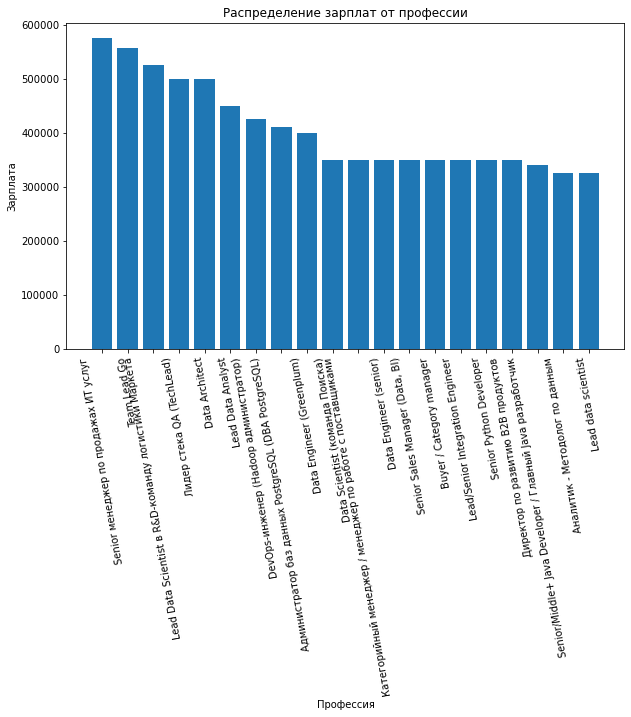

In [46]:
plt.figure(figsize=(10, 6))
plt.bar(top_20_vacancies['name'], top_20_vacancies['mean_salary'])
plt.xlabel('Профессия')
plt.ylabel('Зарплата')
plt.title('Распределение зарплат от профессии')
plt.xticks(rotation=100)
plt.show()

In [ ]:
df['name'].nunique()

In [ ]:
a